## Simulate a stationary time series

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

$ARMA(1,1)$ Process: $v[k]+0.7 v[k-1]= e[k]+0.6e[k-1]$

In [3]:
ar = np.array([1,0.7])
ma = np.array([1,0.6])

In [4]:
arma_process= sm.tsa.ArmaProcess(ar, ma)

$D(z^{-1})=1+0.7z^{-1}$ <br>
Root of this polynomial $1+0.7z^{-1}=0$ is $-1.428$ (in terms of $z^{-1}$)

In [5]:
arma_process.arroots

array([-1.42857143])

$H(z^{-1})=1+0.6z^{-1}$ <br>
Root of this polynomial $1+0.6z^{-1}=0$ is $-1.666$ (in terms of $z^{-1}$)

In [6]:
arma_process.maroots

array([-1.66666667])

Since the roots are outside the unit circle (in terms of $z^{-1}$)

In [7]:
arma_process.isstationary & arma_process.isinvertible

True

Generate a time series $v[k]$ of 500 observations

In [42]:
vk_array=arma_process.generate_sample(500)

In [43]:
vk=pd.Series(vk_array)

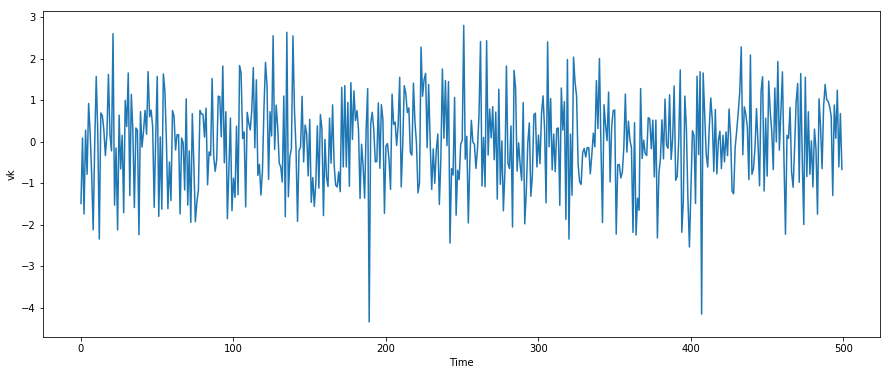

In [44]:
ylabel='vk'
xlabel='Time'
ax = vk.plot(figsize=(15,6))
ax.set(xlabel=xlabel, ylabel=ylabel);

## Time Series Modelling

Forget the process that we used to generate this time series. Assume we are given with the time series $v[k]$

In [45]:
# Step 1: Summary Statistic of vk
vk.describe()

count    500.000000
mean      -0.019349
std        1.090796
min       -4.346314
25%       -0.731489
50%        0.025505
75%        0.720014
max        2.797952
dtype: float64

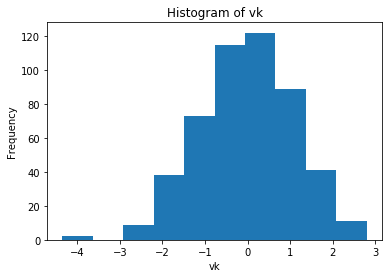

In [46]:
# Step 2: Test whether the series v[k] has fallen out of a joint Gaussian
title = 'Histogram of vk'
ylabel='Frequency'
xlabel='vk'
ax = vk.plot.hist(title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [47]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

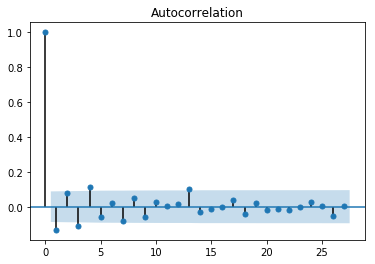

In [48]:
plot_acf(vk);

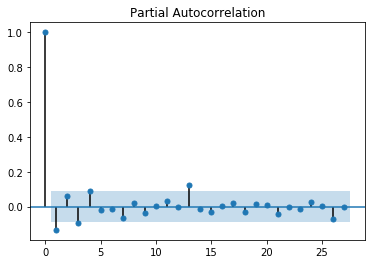

In [49]:
plot_pacf(vk);

In [31]:
# To get the numbers
acf_array = sm.tsa.stattools.acf(vk, nlags=20, fft=False)
pacf_array = sm.tsa.stattools.pacf(vk, nlags=20)

## Fitting an AR(4) Model

In [53]:
#By looking at the PACF, fitting an AR model of order 4 using AutoReg routine
ar4mod = sm.tsa.AutoReg(vk,lags=4, old_names=False).fit()

In [54]:
print(ar4mod.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  500
Model:                     AutoReg(4)   Log Likelihood                -736.704
Method:               Conditional MLE   S.D. of innovations              1.069
Date:                Sun, 13 Jun 2021   AIC                              0.157
Time:                        17:47:03   BIC                              0.208
Sample:                             4   HQIC                             0.177
                                  500                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0138      0.048     -0.287      0.774      -0.108       0.080
y.L1          -0.1113      0.045     -2.489      0.013      -0.199      -0.024
y.L2           0.0422      0.045      0.943      0.3

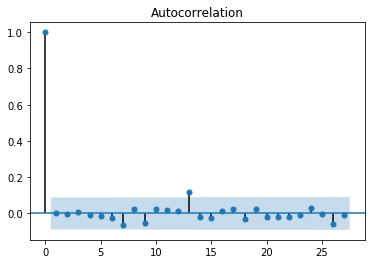

In [55]:
#Residuals have the characteristics of white-noise.
plot_acf(ar4mod.resid);

In [57]:
# Fitting an AR model using ARMA routine
ar4mod2 = sm.tsa.arima.ARIMA(vk, order=(4,0,0)).fit()
print(ar4mod2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -742.750
Date:                Sun, 13 Jun 2021   AIC                           1497.499
Time:                        17:47:45   BIC                           1522.787
Sample:                             0   HQIC                          1507.422
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0188      0.045     -0.413      0.679      -0.108       0.070
ar.L1         -0.1112      0.047     -2.354      0.019      -0.204      -0.019
ar.L2          0.0466      0.047      0.988      0.3

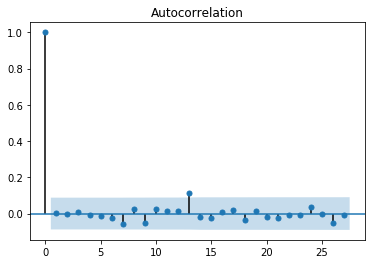

In [58]:
plot_acf(ar4mod2.resid);

## Fitting an ARMA(1,1) Model

In [59]:
arma11mod = sm.tsa.arima.ARIMA(vk, order=(1,0,1)).fit()
print(arma11mod.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -743.314
Date:                Sun, 13 Jun 2021   AIC                           1494.627
Time:                        17:48:41   BIC                           1511.486
Sample:                             0   HQIC                          1501.242
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0187      0.046     -0.411      0.681      -0.108       0.070
ar.L1         -0.8381      0.098     -8.586      0.000      -1.029      -0.647
ma.L1          0.7321      0.120      6.101      0.0

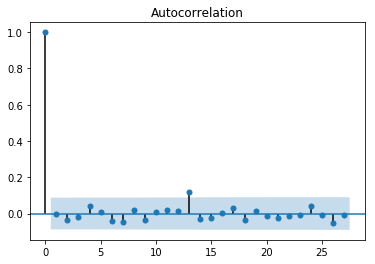

In [60]:
plot_acf(arma11mod.resid);

AIC of $ARMA(1,1)$ is lower and so it is the better fit!